In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=60186bb3acc086ce0aa27a0912f375b47cdecae9e8de7638eba39504644d4f4c
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


<ipython-input-5-5a8caab791e7>:76: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-5-5a8caab791e7>:77: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
<ipython-input-5-5a8caab791e7>:78: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)


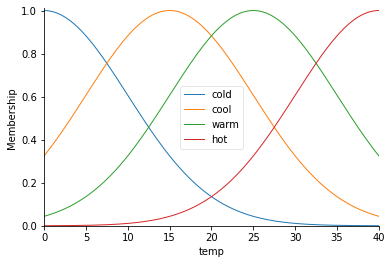

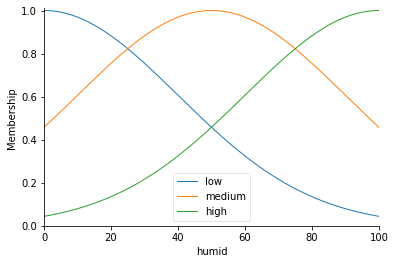

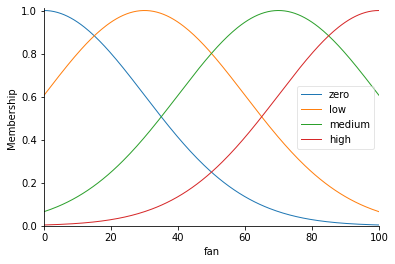

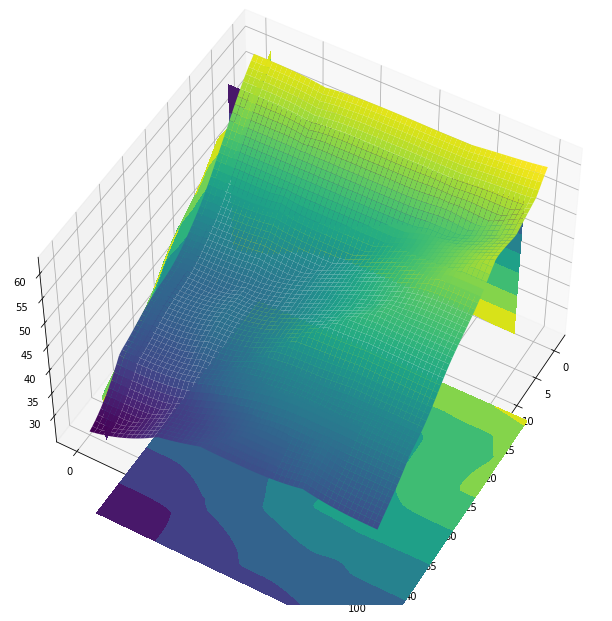

In [5]:
#EXERCISE 4: Fuzzy logic temperature control
import numpy as np
import skfuzzy as fuzzy
import matplotlib
import matplotlib.pyplot as plt

from skfuzzy import control as ctrl
from matplotlib.legend import time
from skfuzzy.control.controlsystem import ControlSystemSimulation
from mpl_toolkits.mplot3d import Axes3D  

#Create Universe with 3 variables temp, humid, and fan
universe = np.linspace(0,40,200) 
universe1 = np.linspace(0,100,200)
universe2 = np.linspace(0,100,200)

#Initialize Antecedent and Consequent
temp = ctrl.Antecedent(universe, 'temp')
humid = ctrl.Antecedent(universe1, 'humid')
fan = ctrl.Consequent(universe2, 'fan')
     
#Set up 
temp['cold'] = fuzzy.gaussmf(temp.universe,0,10)
temp['cool'] = fuzzy.gaussmf(temp.universe,15,10)
temp['warm'] = fuzzy.gaussmf(temp.universe,25,10)
temp['hot'] = fuzzy.gaussmf(temp.universe,40,10)

humid['low'] = fuzzy.gaussmf(humid.universe,0,40)
humid['medium'] = fuzzy.gaussmf(humid.universe,50,40)
humid['high'] = fuzzy.gaussmf(humid.universe,100,40)

fan['zero'] = fuzzy.gaussmf(fan.universe,0,30)
fan['low'] = fuzzy.gaussmf(fan.universe,30,30)
fan['medium'] = fuzzy.gaussmf(fan.universe,70,30)
fan['high'] = fuzzy.gaussmf(fan.universe,100,30)

#Display View
temp.view()
humid.view()
fan.view()

#Set Rules
rules = [ctrl.Rule(antecedent=((temp['cool']&humid['high'])|(temp['cold']&humid['medium'])|
                              (temp['cold']&humid['low'])), consequent= fan['medium']),

         ctrl.Rule(antecedent=((temp['warm']&humid['high'])|(temp['cool']&humid['medium'])|
                              (temp['cool']&humid['low'])), consequent= fan['low']),

         ctrl.Rule(antecedent=((temp['hot']&humid['high'])|(temp['warm']&humid['medium'])|
                              (temp['hot']&humid['medium'])|
                              (temp['hot']&humid['low'])|
                              (temp['warm']&humid['low'])), consequent= fan['zero']),

         ctrl.Rule(antecedent=((temp['cold']&humid['high'])), consequent= fan['high'])]

# Create control system and simulate
System  = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)
upSampled1 = np.linspace(0,40,61)
upSampled2 = np.linspace(0,100,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['temp']= x[i,j]
    sim.input['humid']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['fan']
     

fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',
                      linewidth= 0.4, antialiased= True)
cset = ax.contourf(x,y,z, zdir= 'z', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'x', offset= 6, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'y', offset= 6, cmap= 'viridis', anpha= 0.5)
ax.view_init(50,30)